In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style='whitegrid')

In [317]:
df = pd.read_csv('data/train.csv')

In [318]:
df.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2282,2011-06-03 00:00:00,2,0,1,1,25.42,31.060,38,19.0012,15,53,68
5082,2011-12-05 20:00:00,4,0,1,2,18.86,22.725,82,7.0015,15,190,205
5759,2012-01-15 03:00:00,1,0,0,2,6.56,6.820,48,26.0027,1,24,25


In [319]:
df.shape # before converting into datetime and feature extraction

(10886, 12)

In [320]:
df['datetime'] = pd.to_datetime(df['datetime']) # covert into datatime and then extract days, hours, years, months
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

In [321]:
df.shape # after converting into datetime and feature extraction

(10886, 16)

### Univariate Analysis

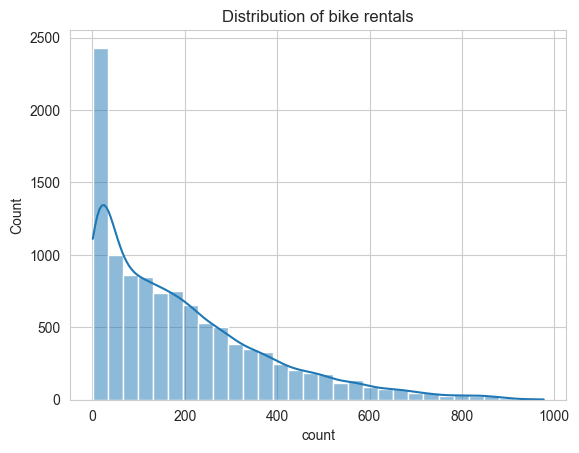

In [322]:
sns.histplot(df['count'], bins=30, kde=True)
plt.title('Distribution of bike rentals')
plt.show()

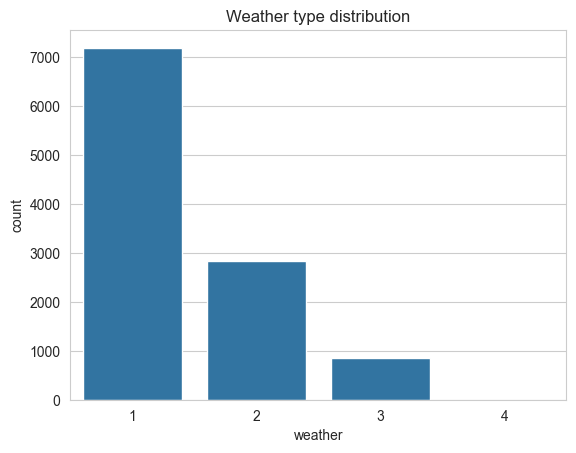

In [323]:
sns.countplot(data=df, x=df['weather'])
plt.title('Weather type distribution')
plt.show()

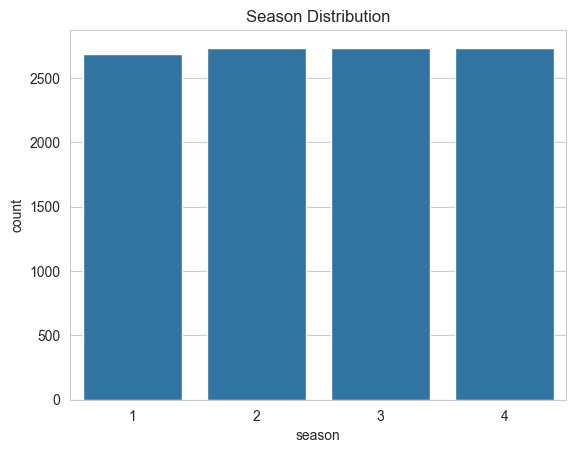

In [324]:
sns.countplot(data=df, x=df['season'])
plt.title('Season Distribution')
plt.show()

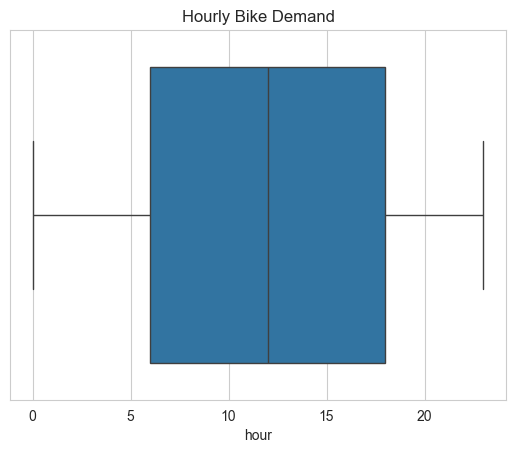

In [325]:
sns.boxplot(data=df, x=df['hour'])
plt.title('Hourly Bike Demand')
plt.show()

### Bivariate Analysis

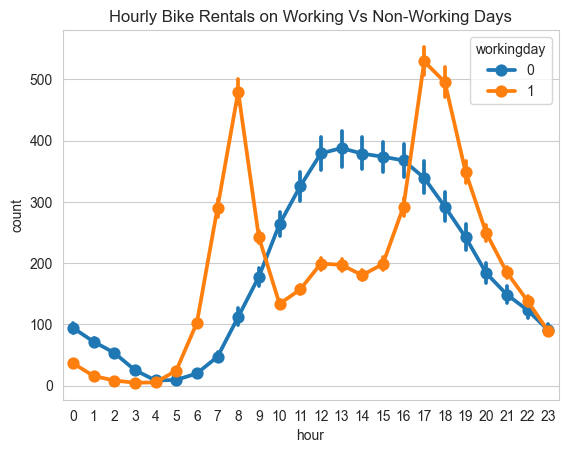

In [326]:
# Rental by hours on working day Vs non-working day
sns.pointplot(data=df, x='hour', y='count', hue='workingday')
plt.title("Hourly Bike Rentals on Working Vs Non-Working Days")
plt.show()

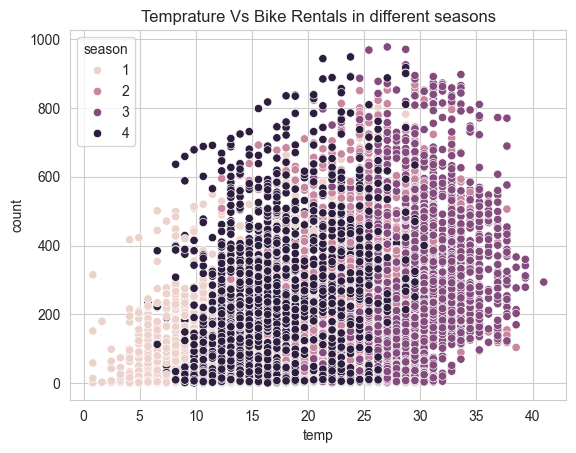

In [327]:
# Temprature Vs Bike Rentals in different seasons
sns.scatterplot(data=df, x='temp', y='count', hue='season')
plt.title('Temprature Vs Bike Rentals in different seasons')
plt.show()

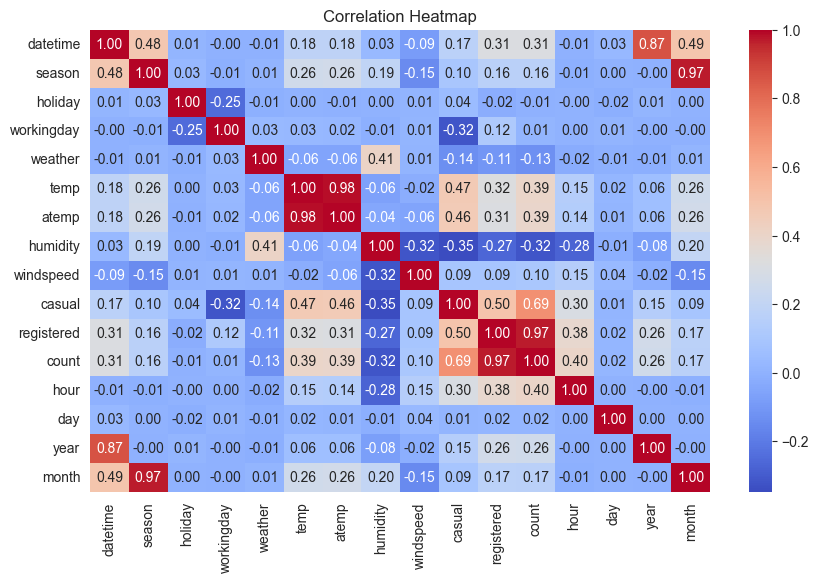

In [328]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Check for outliers

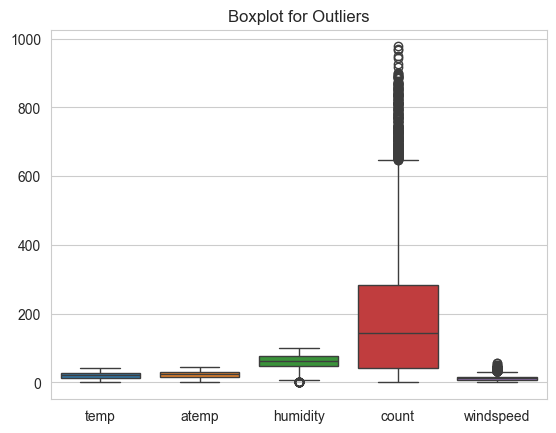

In [329]:
sns.boxplot(data=df[['temp', 'atemp', 'humidity', 'count', 'windspeed']], orient='v')
plt.title('Boxplot for Outliers')
plt.show()

### Daily Average Bike Rentals

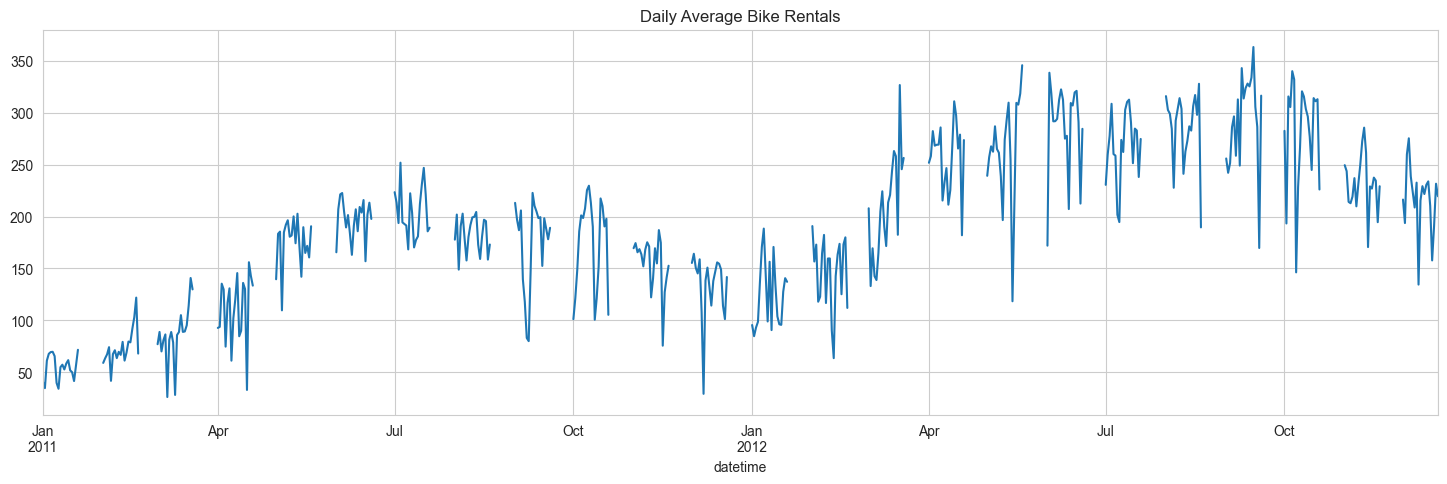

In [330]:
df.set_index('datetime')['count'].resample('D').mean().plot(figsize=(18, 5))
plt.title('Daily Average Bike Rentals')
plt.show()

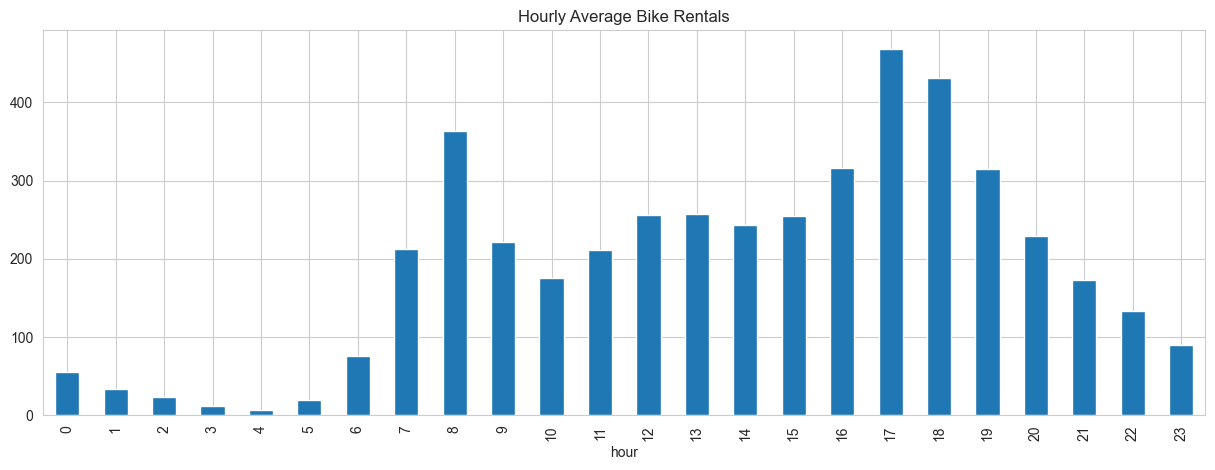

In [331]:
df.groupby('hour')['count'].mean().plot(kind='bar', figsize=(15, 5))
plt.title('Hourly Average Bike Rentals')
plt.show()

In [334]:
new_df = df.copy()

In [337]:
new_df.to_csv('data/new_df.csv', index=False)

In [338]:
new_df.to_csv('data/new_df_without_indexTrue.csv')